# Assignment A1 [35 marks]

This is the first assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 1.2, 2.1, and 3.1 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail!
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A1.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. Go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A1" on Gradescope, and click "Submit".
5. Select your `A1` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Area of a triangle

This question uses formulae and other ideas from

- [1] 'Miscalculating Area and Angles of a Needle-like Triangle', W. Kahan, https://people.eecs.berkeley.edu/~wkahan/Triangle.pdf [accessed 2025-01-24]

Heron's formula is an ancient way of computing the area of a triangle. Given the three side lengths, $a$, $b$, and $c$, for a triangle, the area is given by

$$A_\text{Heron} = \sqrt{s ( s - a ) ( s - b ) ( s - c )},$$

where $s = ( (a + b) + c ) / 2$ is one half of the perimiter.

**1.1** Write a function named `triangle_area_heron` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle, and which returns the area of the triangle as computed using Heron's formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_heron(a, b, c):
    ...
    return area
```

**[2 marks]**

In [6]:
import numpy as np


def triangle_area_heron(a, b, c):
    # Step 1: Calculate the semi-perimeter
    s = (a + b +c)/2

    # Step 2: Calculate the area using Heron's Formula
    area = np.sqrt(s*(s-a)*(s-b)*(s-c))
    
    return area

An alternative formula for the area of a triangle is [1, section 2]

$$A_\text{Kahan} = \frac{1}{4} \sqrt{(a + (b + c)) (c - (a - b)) (c + (a - b)) (a + (b - c))},$$

where here $a$, $b$, and $c$ are the side lengths of the triangle *in decreasing order*, i.e. $a \ge b \ge c$.

**1.2** Write a function named `triangle_area_kahan` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle *not necessarily in decreasing order*, and which returns the area of the triangle as computed using this second formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_kahan(a, b, c):
    ...
    return area
```


**[2 marks]**

In [1]:
import numpy as np


def triangle_area_kahan(a, b, c):
    a, b, c = sorted((a, b, c), reverse=True)
    f_0 = a + (b + c)
    f_1 = c - (a - b)
    f_2 = c + (a - b)
    f_3 = a + (b - c)
    return (1/4) * np.sqrt(f_0 * f_1 * f_2 * f_3)

**1.3** Consider a family of triangles with side lengths

$$a = 2 \varepsilon,$$
$$b = c = \frac{\sqrt{1 + \varepsilon^4}}{\varepsilon},$$

where $\varepsilon$ is some positive number.

Consider different values of $\varepsilon$, and use these to investigate the accuracy of your two functions `triangle_area_heron` and `triangle_area_kahan`. Summarize your results in a discussion of no more than $300$ words.

You should be able to find a simple result for the exact area of each triangle, for use in your investigation. Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

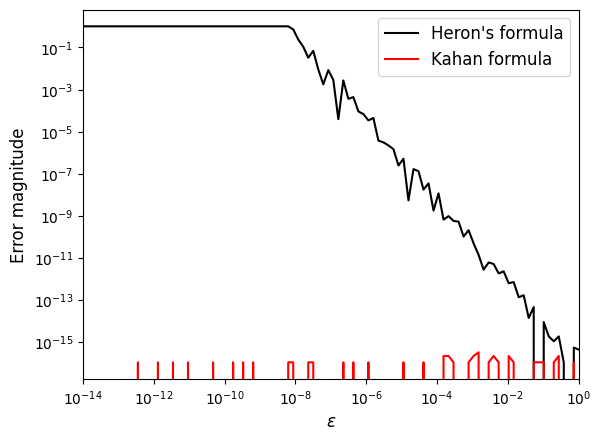

abs(area_heron - area_exact).max()=np.float64(1.0)
abs(area_kahan - area_exact).max()=np.float64(3.3306690738754696e-16)


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
def a(eps):
    return 2 * eps
    
def b(eps):
    return np.sqrt(1 + eps ** 4) / eps
    
def c(eps):
    return b(eps)
    
eps = np.logspace(-14, 0, 100, dtype=float)
area_heron = np.array([triangle_area_heron(a(e), b(e), c(e)) for e in eps],
    dtype=float)
area_kahan = np.array([triangle_area_kahan(a(e), b(e), c(e)) for e in eps],
    dtype=float)
area_exact = 1

fig, ax = plt.subplots(1)
ax.loglog(eps, abs(area_heron - area_exact), "k-", label="Heron's formula")
ax.loglog(eps, abs(area_kahan - area_exact), "r-", label="Kahan formula")
ax.legend(fontsize="large")
ax.set_xlabel(r"$\varepsilon$", fontsize="large")
ax.set_ylabel("Error magnitude", fontsize="large")
ax.set_xlim(eps[0], eps[-1])
plt.show()

print(f"{abs(area_heron - area_exact).max()=}")
print(f"{abs(area_kahan - area_exact).max()=}")


## Discussion
For each $\varepsilon$ the given side lengths describe an isosceles triangle. The area can be computed by dividing the isoscles triangle into two congruent right angled triangles, with one side length equal to $\varepsilon$ and hypotenuse equal to $\sqrt{1 + \varepsilon^4} / \varepsilon$. It follows, using Pythagoras' theorem, that the remaining side length is $1 / \varepsilon$, and hence the area of each right-angled triangle (using 'half base times height') is one half. Hence the area of each iososceles triangle is one, for any $\varepsilon$.

Here we investigate the accuracy of the calculation for the area using Heron's formula and the formula given in [1, section 2] (preserving brackets). As $\varepsilon$ is decreased, and as seen in the figure, the accuracy of the calculation using Heron's formula degrades, until eventually all accuracy is lost. By contrast the formula given in [1, section 2] remains accurate over all considered $\varepsilon$ -- here considering values down to $\varepsilon = 10^{-14}$, which is close to the double precision used for these calculations.

While in exact arithmetic the two formulae are equivalent, here all calculations are performed using double precision floating point arithmetic, which applies rounding. For Heron's formula the rounding leads to increasingly inaccurate results as $\varepsilon$ is decreased, and as the triangle becomes longer and thinner (more 'needle-like' in the terminology of [1]).

### References

- [1] 'Miscalculating Area and Angles of a Needle-like Triangle', W. Kahan, https://people.eecs.berkeley.edu/~wkahan/Triangle.pdf [accessed 2025-01-24]

## Question 2: Numerical linear algebra

Consider the following sequence of length $2$ vectors,

$$x_0 = \left( \begin{array}{c} 1 \\ 1 \end{array} \right),$$
$$x_{n + 1} = A x_n \quad \text{for} ~ n \ge 0,$$

with

$$A = \left( \begin{array}{cc} 0 & 1 \\ 1 & 1 \end{array} \right).$$

**2.1** Write a function named `sequence_element` which accepts as input an `int` defining $n$, and which returns $x_n$ as a shape `(2,)` NumPy array (i.e. a vector) with integer scalar data type.

The function must have the form

```
def sequence_element(n):
    ...
    return x
```

**[2 marks]**

In [8]:
import numpy as np

def sequence_element(n):
    A = np.array([[0, 1],
                [1, 1]], dtype=int)
    x = np.array([1, 1], dtype=int)
    for _ in range(n):
        x = A @ x
    return x


**2.2** Perform numerical calculations to investigate

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|},$$

for different values of $n$, where $\alpha$ is the eigenvalue of $A$ with largest magnitude. Here $\left\| \cdot \right\|$ denotes the Euclidean $2$-norm. Comment on the results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

(0.0, 100.0)

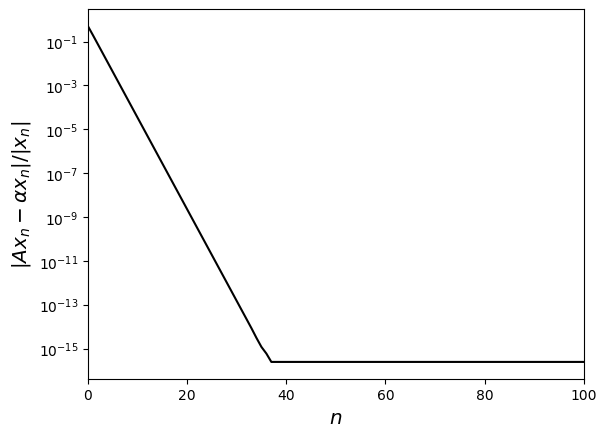

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

e = []

A = np.array([[0, 1],
              [1, 1]], dtype=int)
eig, _ = np.linalg.eig(A)
alpha = eig[np.argmax(abs(eig))]
x = np.array([1, 1], dtype=float)
max_N = 100
for _ in range(max_N + 1):
    x /= np.linalg.norm(x)
    e.append(np.linalg.norm(A @ x - alpha * x))
    x = A @ x

fig, ax = plt.subplots(1, 1)
ax.semilogy(range(max_N + 1), e, "k-")
ax.set_xlabel("$n$", fontsize="x-large")
ax.set_ylabel(r"$|A x_n - \alpha x_n| / |x_n|$", fontsize="x-large")
ax.set_xlim(0, max_N)

## Discussion

We can use

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|} = \left\| A \hat{x}_n - \alpha \hat{x}_n \right\|,$$

where

$$\hat{x}_n = \frac{1}{\left\|x_n\right\|} x_n,$$

together with

\begin{align*}
  \hat{x}_{n + 1}
    & = \frac{1}{\left\| x_{n + 1} \right\|} A x_n \\
    & = \frac{1}{\left\| A x_n \right\|} A x_n \\
    & = \frac{\left\| x_n \right\|}{\left\| A x_n \right\|} A \hat{x}_n \\
    & = \frac{1}{\left\| A \hat{x}_n \right\|} A \hat{x}_n,
\end{align*}

to simplify the calculation and to avoid very large norm $x_n$ being encountered. In particular we can renormalize $x_n$ during the calculation to avoid large norm $x_n$ and to reduce the impact of numerical precision errors. Using this approach we find that $e_n$ approaches zero as $n$ is increased, until a small value is reached. This suggests that, as $n$ is increased, $\hat{x}_n$ tends towards an eigenvector of $A$ with unit magnitude, with associated eigenvalue $\alpha$. For sufficiently large $n$ this further suggests that $\hat{x}_n$ has reach an eigenvector of $A$, to within an error limited by the use of finite precision arithmetic.

Write $x_0$ as

$$x_0 = \left( \begin{array}{c} y_0 \\ y_1 \end{array} \right),$$

with $y_0 = y_1$. We therefore have that the elements of $x_0$ are the first two elements in the Fibonacci sequence. Assuming that the elements of $x_n$ are the $n$th and $( n + 1 )$th elements of the Fibonacci sequence (counting from zero), denoted $y_n$ and $y_{n + 1}$ respectively, we have

$$x_{n + 1} = A x_n = \left( \begin{array}{c} y_{n + 1} \\ y_n + y_{n + 1} \end{array} \right),$$

which are the $( n + 1)$ th and $( n + 2 )$ th elements of the Fibonacci sequence (counting from zero). Hence by induction the elements of $x_n$ are the $n$th and $( n + 1 )$ th elements of the Fibonacci sequence (counting from zero) for all $n$.

## Question 3: Numerical integration

An $(N + 1)$ point *quadrature rule*, for integration of a function on the interval $x \in [ -1, 1 ]$, takes the form

$$\int_{-1}^1 f(x) dx \approx \sum_{i = 0}^N w_i f( x_i ),$$

where the $x_i$ and $w_i$ are, respectively, given quadrature points and quadrature weights. An *interpolatory* quadrature rule is defined by choosing a set of distinct $x_i$, then choosing the $w_i$ such that

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N w_i f( x_i ),$$

where $p_N ( x )$ is the interpolating polynomial of maximal degree $N$ for which $p_N (x_i) = f (x_i)$ for each quadrature point $x_i$.

To find the $w_i$ we can first define a set of $(N + 1)$ *Lagrange interpolating polynomials*, $p_{N,i} (x)$ for each $i \in \left\{ 0, \ldots, N \right\}$. Each of these is defined such that

$$p_{N,i} (x_j) = \delta_{i,j} = \begin{cases} 1 & \text{if} ~ i = j \\ 0 & \text{otherwise} \end{cases}.$$

We use this to re-express the interpolating polynomial

$$p_N (x) = \sum_{i = 0}^N p_{N,i} (x) f (x_i).$$

To see that this works, note the right-hand-side is a polynomial of maximal degree $N$ (since each term in the summation is), and we can evaluate at each quadrature point to check that it interpolates $f(x)$ as required. Hence

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N \left[ \int_{-1}^1 p_{N,i} (x) dx \right] f (x_i) = \sum_{i = 0}^N w_i f( x_i ),$$

and so the quadrature weights are

$$w_i = \int_{-1}^1 p_{N,i} (x) dx.$$

**3.1** Write a function `interpolatory_quadrature_weights` which takes in a shape `(N + 1,)` NumPy array with floating point scalar data type defining quadrature points $x_i$, and returns a shape `(N + 1,)` NumPy array containing corresponding values for the interpolatory quadrature rule quadrature weights.

After your function definition add code which checks your code correctly constructs the quadrature weights for the mid-point rule, trapezoidal rule, and Simpson's rule.

The function must have the form

```
def interpolatory_quadrature_weights(x):
    ...
    return w
```

**[5 marks]**

In [10]:
import numpy as np


def interpolatory_quadrature_weights(x):
    x = np.asarray(x)
    N, = x.shape
    N -= 1

    w = np.zeros_like(x, dtype=float)
    for i in range(N + 1):
        v = np.zeros_like(x)
        v[i] = 1
        p_Ni = np.polyfit(x, v, N)
        p_Ni_int = np.polyint(p_Ni)
        w[i] = np.polyval(p_Ni_int, 1) - np.polyval(p_Ni_int, -1)

    return w


# Mid-point rule: Weight 2
w_mid_point = interpolatory_quadrature_weights(np.array([0], dtype=float))
print(f"Mid-point rule weights  : {w_mid_point}")
assert np.allclose(w_mid_point, [2])

# Trapezoidal rule: Weights 1
w_trapezoidal = interpolatory_quadrature_weights(np.array([-1, 1], dtype=float))
print(f"Trapezoidal rule weights: {w_trapezoidal}")
assert np.allclose(w_trapezoidal, [1, 1])

# Simpson's rule: Weights 1/3 for the end-points, 4/3 for the mid-point
w_simpsons = interpolatory_quadrature_weights(np.array([-1, 0, 1], dtype=float))
print(f"Simpson's rule weights  : {w_simpsons}")
assert np.allclose(w_simpsons, [1/3, 4/3, 1/3])

Mid-point rule weights  : [2.]
Trapezoidal rule weights: [1. 1.]
Simpson's rule weights  : [0.33333333 1.33333333 0.33333333]


**3.2** For a given positive integer $N$ consider two sets of quadrature points

$$x_{0,i} = -1 + \frac{2 i}{N},$$

and

$$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right),$$

each defined for $i \in \left\{ 0, \ldots, N \right\}$. We can use these to define two different sets of interpolatory quadrature rules.

Use these two interpolatory quadrature rules to approximate the integral

$$\int_{-1}^1 f (x) dx,$$

with

$$f(x) = \frac{1}{1 + (3 x)^2}.$$

Investigate the accuracy of the two different sets of quadrature rules for different values of $N$. Summarize your results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[10 marks]**

Text(0.5, 1.0, '$x_{1,i}$ points')

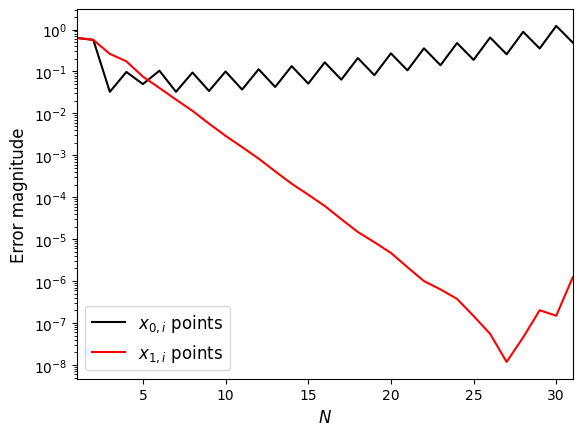

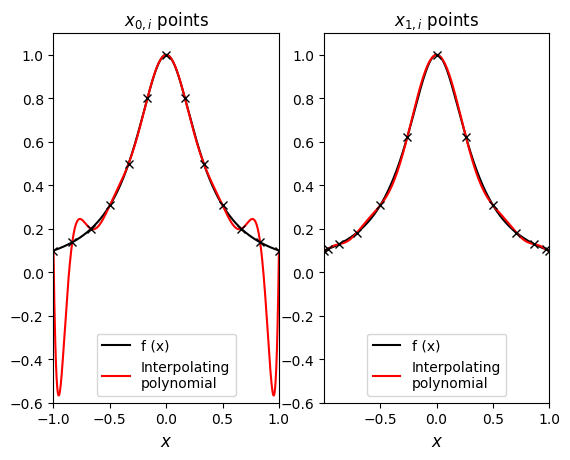

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt


def quadrature_rule_0(N):
    i = np.arange(N + 1, dtype=float)
    x = -1 + (2/N) * i
    return interpolatory_quadrature_weights(x), x


def quadrature_rule_1(N):
    i = np.arange(N + 1, dtype=float)
    x = -np.cos(i * np.pi / N)
    return interpolatory_quadrature_weights(x), x


def f(x):
    return 1 / (1 + (3 * x) ** 2)


# This upper limit is chosen to avoid a significant number of warnings
# being shown in these model solutions
N = np.arange(1, 32, dtype=int)
approx_0 = []
approx_1 = []
for n in N:
    w_0, x_0 = quadrature_rule_0(n)
    w_1, x_1 = quadrature_rule_1(n)
    approx_0.append((w_0 * f(x_0)).sum())
    approx_1.append((w_1 * f(x_1)).sum())
approx_0 = np.array(approx_0, dtype=float)
approx_1 = np.array(approx_1, dtype=float)

exact = 2 * np.arctan(3) / 3

fig, ax = plt.subplots(1)
ax.semilogy(N, abs(approx_0 - exact), "k-", label="$x_{0,i}$ points")
ax.semilogy(N, abs(approx_1 - exact), "r-", label="$x_{1,i}$ points")
ax.legend(fontsize="large")
ax.set_xlabel("$N$", fontsize="large")
ax.set_ylabel("Error magnitude", fontsize="large")
ax.set_xlim(N[0], N[-1])

N = 12
fig, ax = plt.subplots(1, 2)
x_plot = np.linspace(-1, 1, 1000, dtype=float)

_, x_0 = quadrature_rule_0(N)
p_0 = np.polyfit(x_0, f(x_0), N)
ax[0].plot(x_plot, f(x_plot), "k-", label="f (x)")
ax[0].plot(x_plot, np.polyval(p_0, x_plot), "r-", label="Interpolating\npolynomial")
ax[0].plot(x_0, f(x_0), "kx", markersize=6)
ax[0].legend(loc="lower center")
ax[0].set_xlabel("$x$", fontsize="large")
ax[0].set_xlim(x_plot[0], x_plot[-1])
ax[0].set_ylim(-0.6, 1.1)
ax[0].set_title("$x_{0,i}$ points")

_, x_1 = quadrature_rule_1(N)
p_1 = np.polyfit(x_1, f(x_1), N)
ax[1].plot(x_plot, f(x_plot), "k-", label="f (x)")
ax[1].plot(x_plot, np.polyval(p_1, x_plot), "r-", label="Interpolating\npolynomial")
ax[1].plot(x_1, f(x_1), "kx", markersize=6)
ax[1].legend(loc="lower center")
ax[1].set_xlabel("$x$", fontsize="large")
ax[1].set_xlim(x_plot[1], x_plot[-1])
ax[1].set_ylim(-0.6, 1.1)
ax[1].set_title("$x_{1,i}$ points")

## Discussion

We first evaluate the exact value for the integral. In the following we use symmetry of the integrand, then the substitution $3 x = \tan \theta$,

\begin{align*}
  \int_{-1}^1 \frac{1}{1 + (3 x)^2} dx
    & = 2 \int_0^1 \frac{1}{1 + (3 x)^2} dx \\
    & = 2 \int_0^{\arctan 3} \frac{1}{1 + \tan^2 \theta} \frac{dx}{d\theta} d\theta \\
    & = \frac{2}{3} \int_0^{\arctan 3} 1 d\theta \\
    & = \frac{2}{3} \arctan 3.
\end{align*}

We can use this to investigate the accuracy of the two quadrature rules for different values of $N$, computing the magnitude of the error in each case, shown in the upper figure.

We find, for the *second* quadrature rule defined by the $x_{1,i}$, that for lower values of $N$ the error magnitude decreases, and the near straight line in the semilog plot suggests that it does so exponentially with $N$. At larger values of $N$ the error magnitude begins to increase, which suggests that numerical precision errors are affecting the results for these values of $N$.

The behaviour for the *first* quadrature rule defined by the $x_{0,i}$ is very different, and we find that the error magnitude does not decrease with $N$. To see why we can consider the interpolating polynomial for one moderate value of $N$, say $N = 12$, shown in the lower figure. Plotting the interpolating polynomial using the $x_{0,i}$ points we see very significant errors near the end points, while the interpolating polynomial associated with the $x_{1,i}$ has much better behaviour, with smaller errors between the interpolation points.

The first set of points leads to *Newton-Cotes* quadrature rules, the lowest order of which are the trapezoidal rule and Simpson's rule. These can have bad behaviour at higher degree, as interpolating using evenly spaced points can lead to large errors, as observed here.

The second set of points are the *Chebyshev nodes of the second kind*, and these lead to *Clenshaw-Curtis* quadrature rules. These rules use the much better behaviour associated with polynomial interpolation using Chebyshev nodes -- studying this better behaviour is beyond the scope of this course.